In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
df = pd.read_csv("hr_employee_attrition_cleaned_data.csv")
df.head(1)


,Employee_ID,Age,Gender,Job_Role,Monthly_Income,Job_Satisfaction,Work_Life_Balance,Distance_From_Home_KM,Num_Projects,Avg_Monthly_Hours,Years_at_Company,Years_Since_Last_Promotion,Training_Times_Last_Year,Education_Level,Attrition_Risk_Level,Age_Group,Income_Band,Over_worked_Flag,Promotion_Gap
0,EMP-00001,28,Male,Manager,5873,2,4,20.5,5,193.6,4,4,2,2,1,26-35,Medium,No,Yes


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_ID                 15000 non-null  object 
 1   Age                         15000 non-null  int64  
 2   Gender                      15000 non-null  object 
 3   Job_Role                    15000 non-null  object 
 4   Monthly_Income              15000 non-null  int64  
 5   Job_Satisfaction            15000 non-null  int64  
 6   Work_Life_Balance           15000 non-null  int64  
 7   Distance_From_Home_KM       15000 non-null  float64
 8   Num_Projects                15000 non-null  int64  
 9   Avg_Monthly_Hours           15000 non-null  float64
 10  Years_at_Company            15000 non-null  int64  
 11  Years_Since_Last_Promotion  15000 non-null  int64  
 12  Training_Times_Last_Year    15000 non-null  int64  
 13  Education_Level             150

In [8]:
# Check missing values
df.isnull().sum()

Employee_ID                   0
Age                           0
Gender                        0
Job_Role                      0
Monthly_Income                0
Job_Satisfaction              0
Work_Life_Balance             0
Distance_From_Home_KM         0
Num_Projects                  0
Avg_Monthly_Hours             0
Years_at_Company              0
Years_Since_Last_Promotion    0
Training_Times_Last_Year      0
Education_Level               0
Attrition_Risk_Level          0
Age_Group                     0
Income_Band                   0
Over_worked_Flag              0
Promotion_Gap                 0
dtype: int64

In [9]:
df['Attrition_Risk_Level'].value_counts()

Attrition_Risk_Level
0    7500
1    5250
2    2250
Name: count, dtype: int64

In [22]:
# New Column Attrition_Label
df['Attrition_Label'] = df['Attrition_Risk_Level'].map({
    0: 'Low',
    1: 'Medium',
    2: 'High'
})

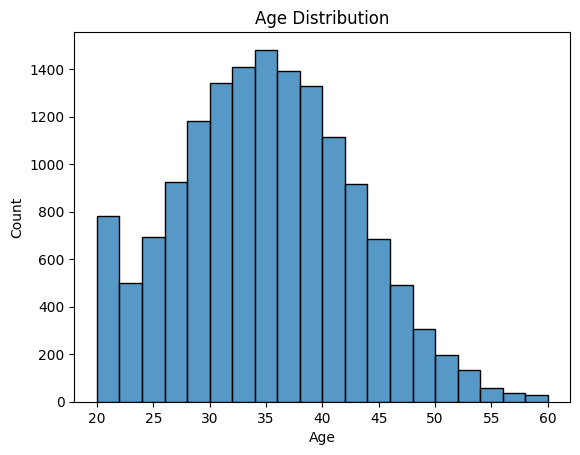

In [10]:
# Age Distribution
plt.figure()
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution")
plt.show()

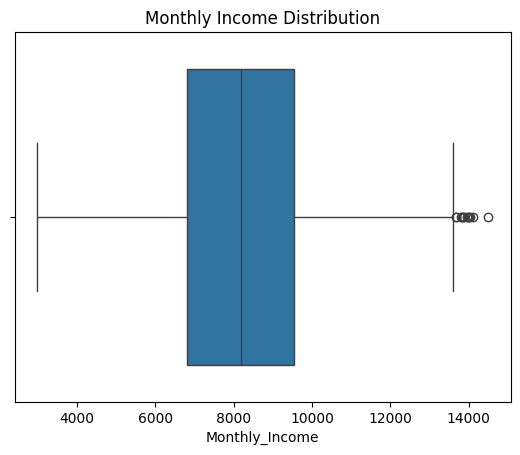

In [11]:
# Monthly Income Distribution
plt.figure()
sns.boxplot(x=df['Monthly_Income'])
plt.title("Monthly Income Distribution")
plt.show()


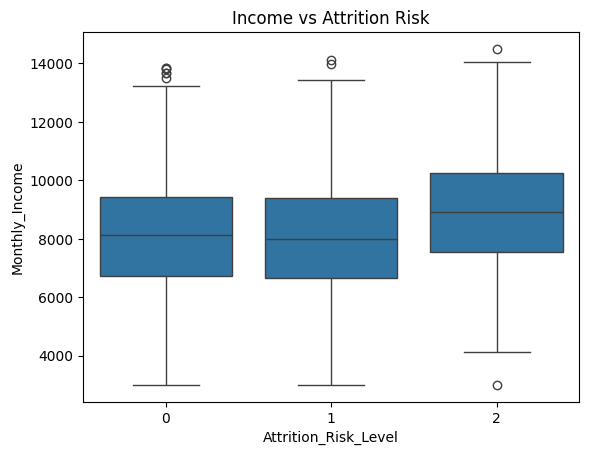

In [13]:
# Income vs Attrition Risk
plt.figure()
sns.boxplot(x='Attrition_Risk_Level', y='Monthly_Income', data=df)
plt.title("Income vs Attrition Risk")
plt.show()

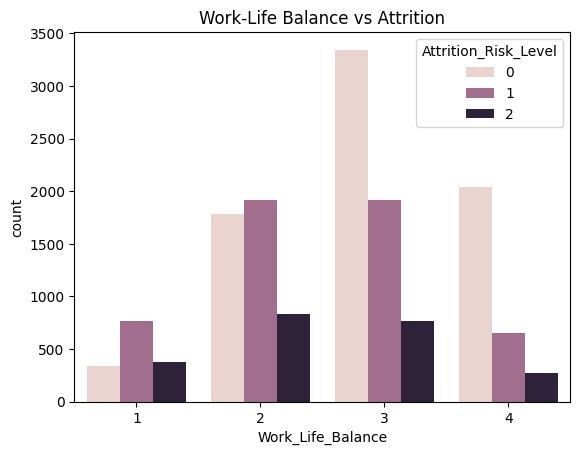

In [15]:
# Work-Life Balance vs Attrition
plt.figure()
sns.countplot(x='Work_Life_Balance', hue='Attrition_Risk_Level', data=df)
plt.title("Work-Life Balance vs Attrition")
plt.show()

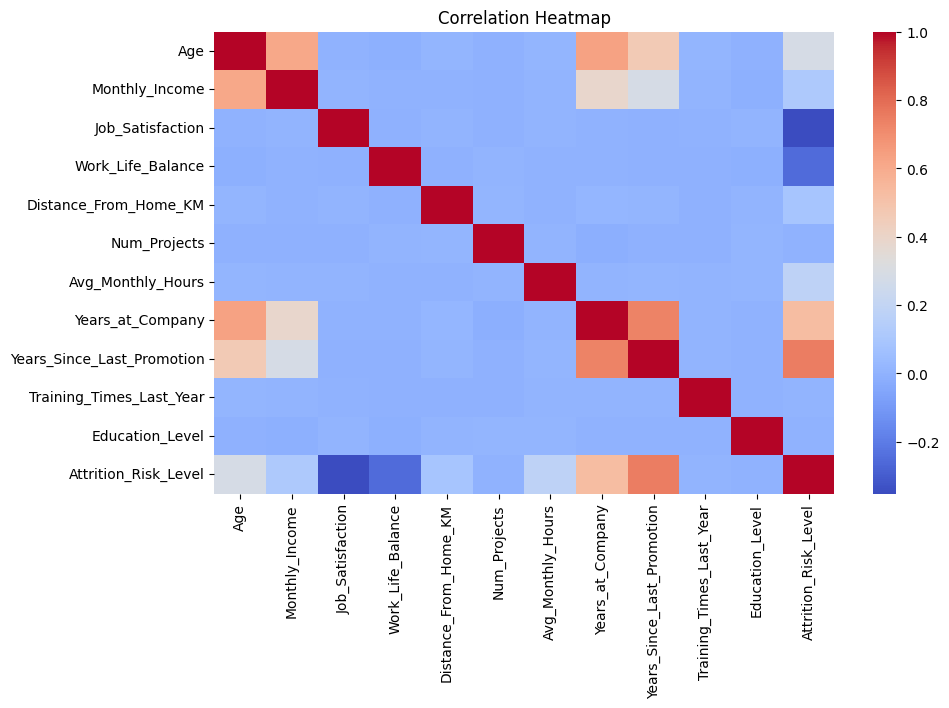

In [17]:
# Correlation Analysis
num_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Encode Categorical Variables
le = LabelEncoder()

cat_cols = ['Gender', 'Job_Role', 'Income_Band', 'Age_Group', 'Promotion_Gap', 'Over_worked_Flag']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
# Feature Importance Using Random Forest
X = df.drop(columns=['Employee_ID', 'Attrition_Label', 'Attrition_Risk_Level'])
y = df['Attrition_Risk_Level']

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [26]:
# Train Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [27]:
# Model Evaluation
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2152   98    0]
 [  97 1444   28]
 [   0   68  613]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2250
           1       0.90      0.92      0.91      1569
           2       0.96      0.90      0.93       681

    accuracy                           0.94      4500
   macro avg       0.94      0.93      0.93      4500
weighted avg       0.94      0.94      0.94      4500



In [29]:
# Featuring Importance Output
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance.head(10)

,Feature,Importance
10,Years_Since_Last_Promotion,0.256024
4,Job_Satisfaction,0.163182
16,Promotion_Gap,0.102229
5,Work_Life_Balance,0.085736
8,Avg_Monthly_Hours,0.083255
9,Years_at_Company,0.071124
3,Monthly_Income,0.049511
6,Distance_From_Home_KM,0.048626
0,Age,0.033877
11,Training_Times_Last_Year,0.019728


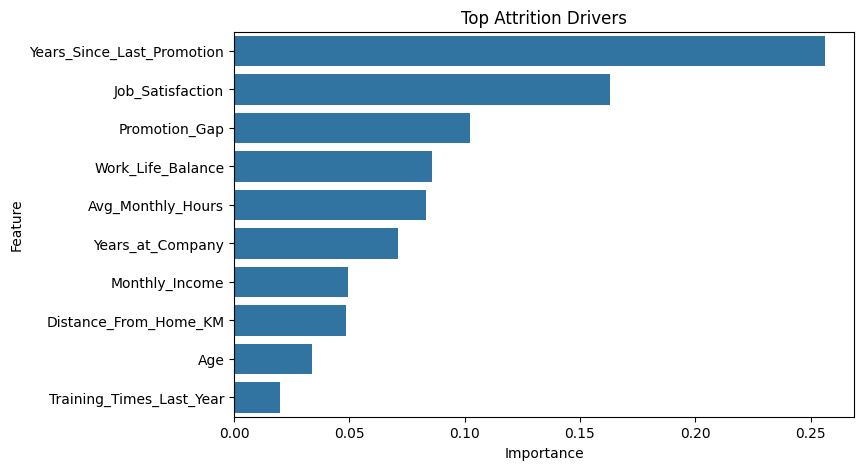

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title("Top Attrition Drivers")
plt.show()

Key Drivers of Attrition Risk:

Work-Life Balance

Years Since Last Promotion

Avg Monthly Hours

Monthly Income